In [84]:
import os
import pandas as pd
import datetime
import seaborn as sns; sns.set_theme(color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Warning configuration
import warnings
warnings.filterwarnings('ignore')

In [85]:
path_file = "D:/DATA SCIENCE/Tech test Fraud/dataset/unified/cleaned_data.csv"

In [86]:
df = pd.read_csv (path_file, sep = ',')

In [87]:
df.dtypes

TRANS DATE             object
TRANS VAT DESC         object
ORIGINAL GROSS AMT    float64
ORIGINAL CUR           object
BILLING GROSS AMT     float64
BILLING CUR CODE       object
TRANS TAX RATE        float64
TRANS TAX AMT         float64
MERCHANT NAME          object
CARD NUMBER            object
TRANS CAC CODE 1       object
TRANS CAC DESC 1       object
TRANS CAC CODE 2       object
TRANS CAC DESC 2       object
TRANS CAC CODE 3       object
DIRECTORATE            object
TRANS_DATE_YM          object
TRANS_DATE_Y            int64
TRANS_DATE_M            int64
TRANS_DATE_D            int64
dtype: object

Cotinue the analysis with the numerical variables

In [88]:
df.head(2)

,TRANS DATE,TRANS VAT DESC,ORIGINAL GROSS AMT,ORIGINAL CUR,BILLING GROSS AMT,BILLING CUR CODE,TRANS TAX RATE,TRANS TAX AMT,MERCHANT NAME,CARD NUMBER,TRANS CAC CODE 1,TRANS CAC DESC 1,TRANS CAC CODE 2,TRANS CAC DESC 2,TRANS CAC CODE 3,DIRECTORATE,TRANS_DATE_YM,TRANS_DATE_Y,TRANS_DATE_M,TRANS_DATE_D
0,2018-08-02,VR,68.0,GBP,68.0,GBP,20.0,11.33,beeches road servi,************5804,K020,Vehicle Fuel,RVA11,Beeches GOLDD,A00,Adult Social Care and Health,2018-08,2018,8,2
1,2018-07-26,VR,68.0,GBP,68.0,GBP,20.0,11.33,beeches road servi,************5804,K020,Vehicle Fuel,RVA11,Beeches GOLDD,A00,Adult Social Care and Health,2018-07,2018,7,26


In [89]:
# For numeric fields it obtains the basic statistical information
df_desc_numeric = df.describe().T.reset_index(level=0).rename(columns={"index": "columna"})
df_desc_numeric.iloc[:,0]

0    ORIGINAL GROSS AMT
1     BILLING GROSS AMT
2        TRANS TAX RATE
3         TRANS TAX AMT
4          TRANS_DATE_Y
5          TRANS_DATE_M
6          TRANS_DATE_D
Name: columna, dtype: object

<Axes: >

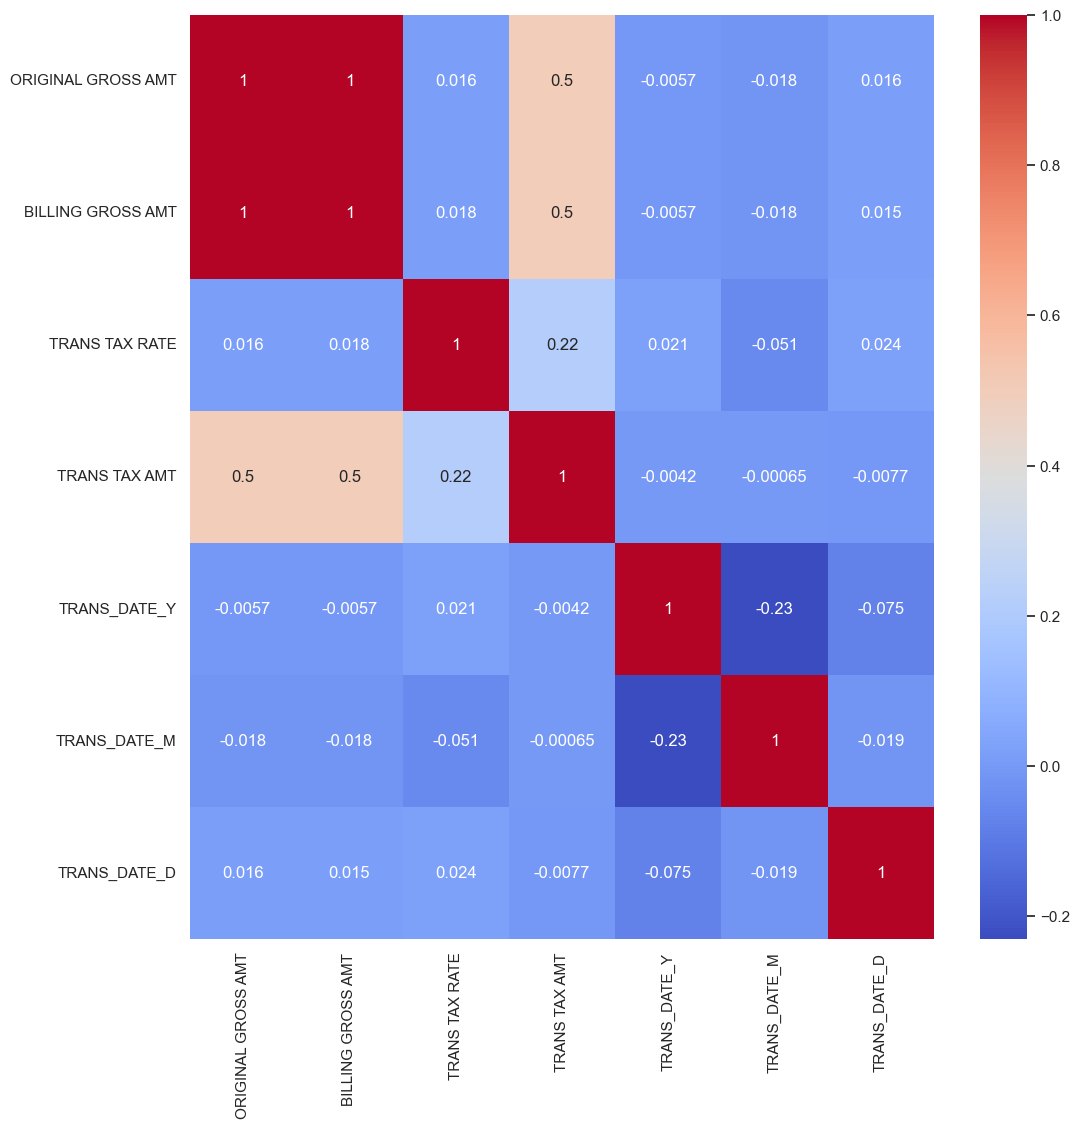

In [90]:
plt.figure(figsize = (12, 12))
sns.heatmap(df[df_desc_numeric.iloc[:,0]].corr(), annot=True, cmap='coolwarm', 
            xticklabels=df_desc_numeric.iloc[:,0],
            yticklabels=df_desc_numeric.iloc[:,0])

In [91]:
df['MERCHANT NAME'].value_counts()


MERCHANT NAME
amzn mktp uk                 989
amazon uk marketplace        567
asda groceries online        506
amazon.co.uk                 361
amzn mktp uk amazon.co.uk    268
                            ... 
amzn mktp ukmt46r5au4          1
amazon.co.ukmt2ak9nn4 am       1
amazon.co.ukmt4ld4tu4 am       1
amzn mktp ukmt3s600p4          1
windmill tea rooms             1
Name: count, Length: 5591, dtype: int64

In [92]:
# Analyse the original gross amt variable;

df['ORIGINAL GROSS AMT'].describe()

count    20795.000000
mean        92.274285
std        342.506397
min      -2293.350000
25%         12.940000
50%         38.560000
75%         84.000000
max      14994.000000
Name: ORIGINAL GROSS AMT, dtype: float64

In [93]:
df['TRANS CAC CODE 1'].value_counts()

TRANS CAC CODE 1
L100    3990
K020    2154
L220    2090
L030    1984
MC70    1423
        ... 
M990       1
L5G0       1
J130       1
J1K0       1
J260       1
Name: count, Length: 103, dtype: int64

In [94]:
df['TRANS CAC DESC 1'].value_counts()

TRANS CAC DESC 1
Equip Operational       3990
Vehicle Fuel            2154
Purchases Food          2090
Books                   1984
Supplies & Sev Mic      1423
                        ... 
MaChRobes&CivicGifts       1
Security Contracts         1
UDD Cntrlld Rpr Exp        1
AsbestosSurveys&Wrks       1
Rates                      1
Name: count, Length: 103, dtype: int64

In [95]:
df['TRANS CAC CODE 2'].value_counts()

TRANS CAC CODE 2
RUF0F    1488
REAAB     646
RLBMC     415
REAXL     320
REALC     243
         ... 
RTC37       1
RE2TJ       1
RV0C3       1
REH08       1
RLD63       1
Name: count, Length: 587, dtype: int64

In [96]:
df['TRANS CAC DESC 2'].value_counts()

TRANS CAC DESC 2
Illegal Money Lending T Stds Comm Inv.    1488
The City of Birmingham School              646
Technical Unit                             415
Baskerville                                320
St Barnabas CE Junior & Infant  (NC)       243
                                          ... 
Traffic Management Service                   1
Bournville School                            1
TM Panel                                     1
Soho CC C/Care                               1
Selly Oak Library                            1
Name: count, Length: 586, dtype: int64

In [97]:
df['TRANS CAC CODE 3'].value_counts()

TRANS CAC CODE 3
A00             20758
A46                32
TA-01887-01         3
A5F                 2
Name: count, dtype: int64

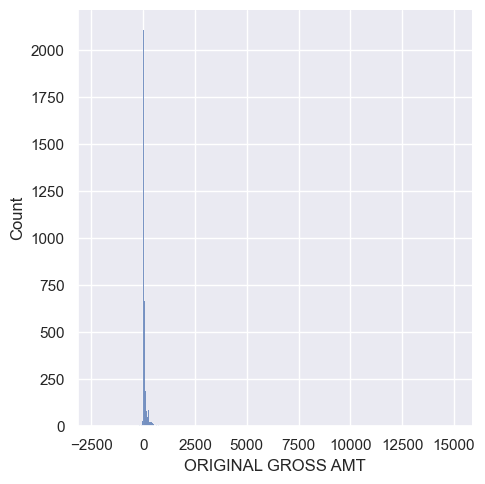

In [98]:
sns.displot(df['ORIGINAL GROSS AMT'])

Text(0, 0.5, 'ORIGINAL GROSS AMT')

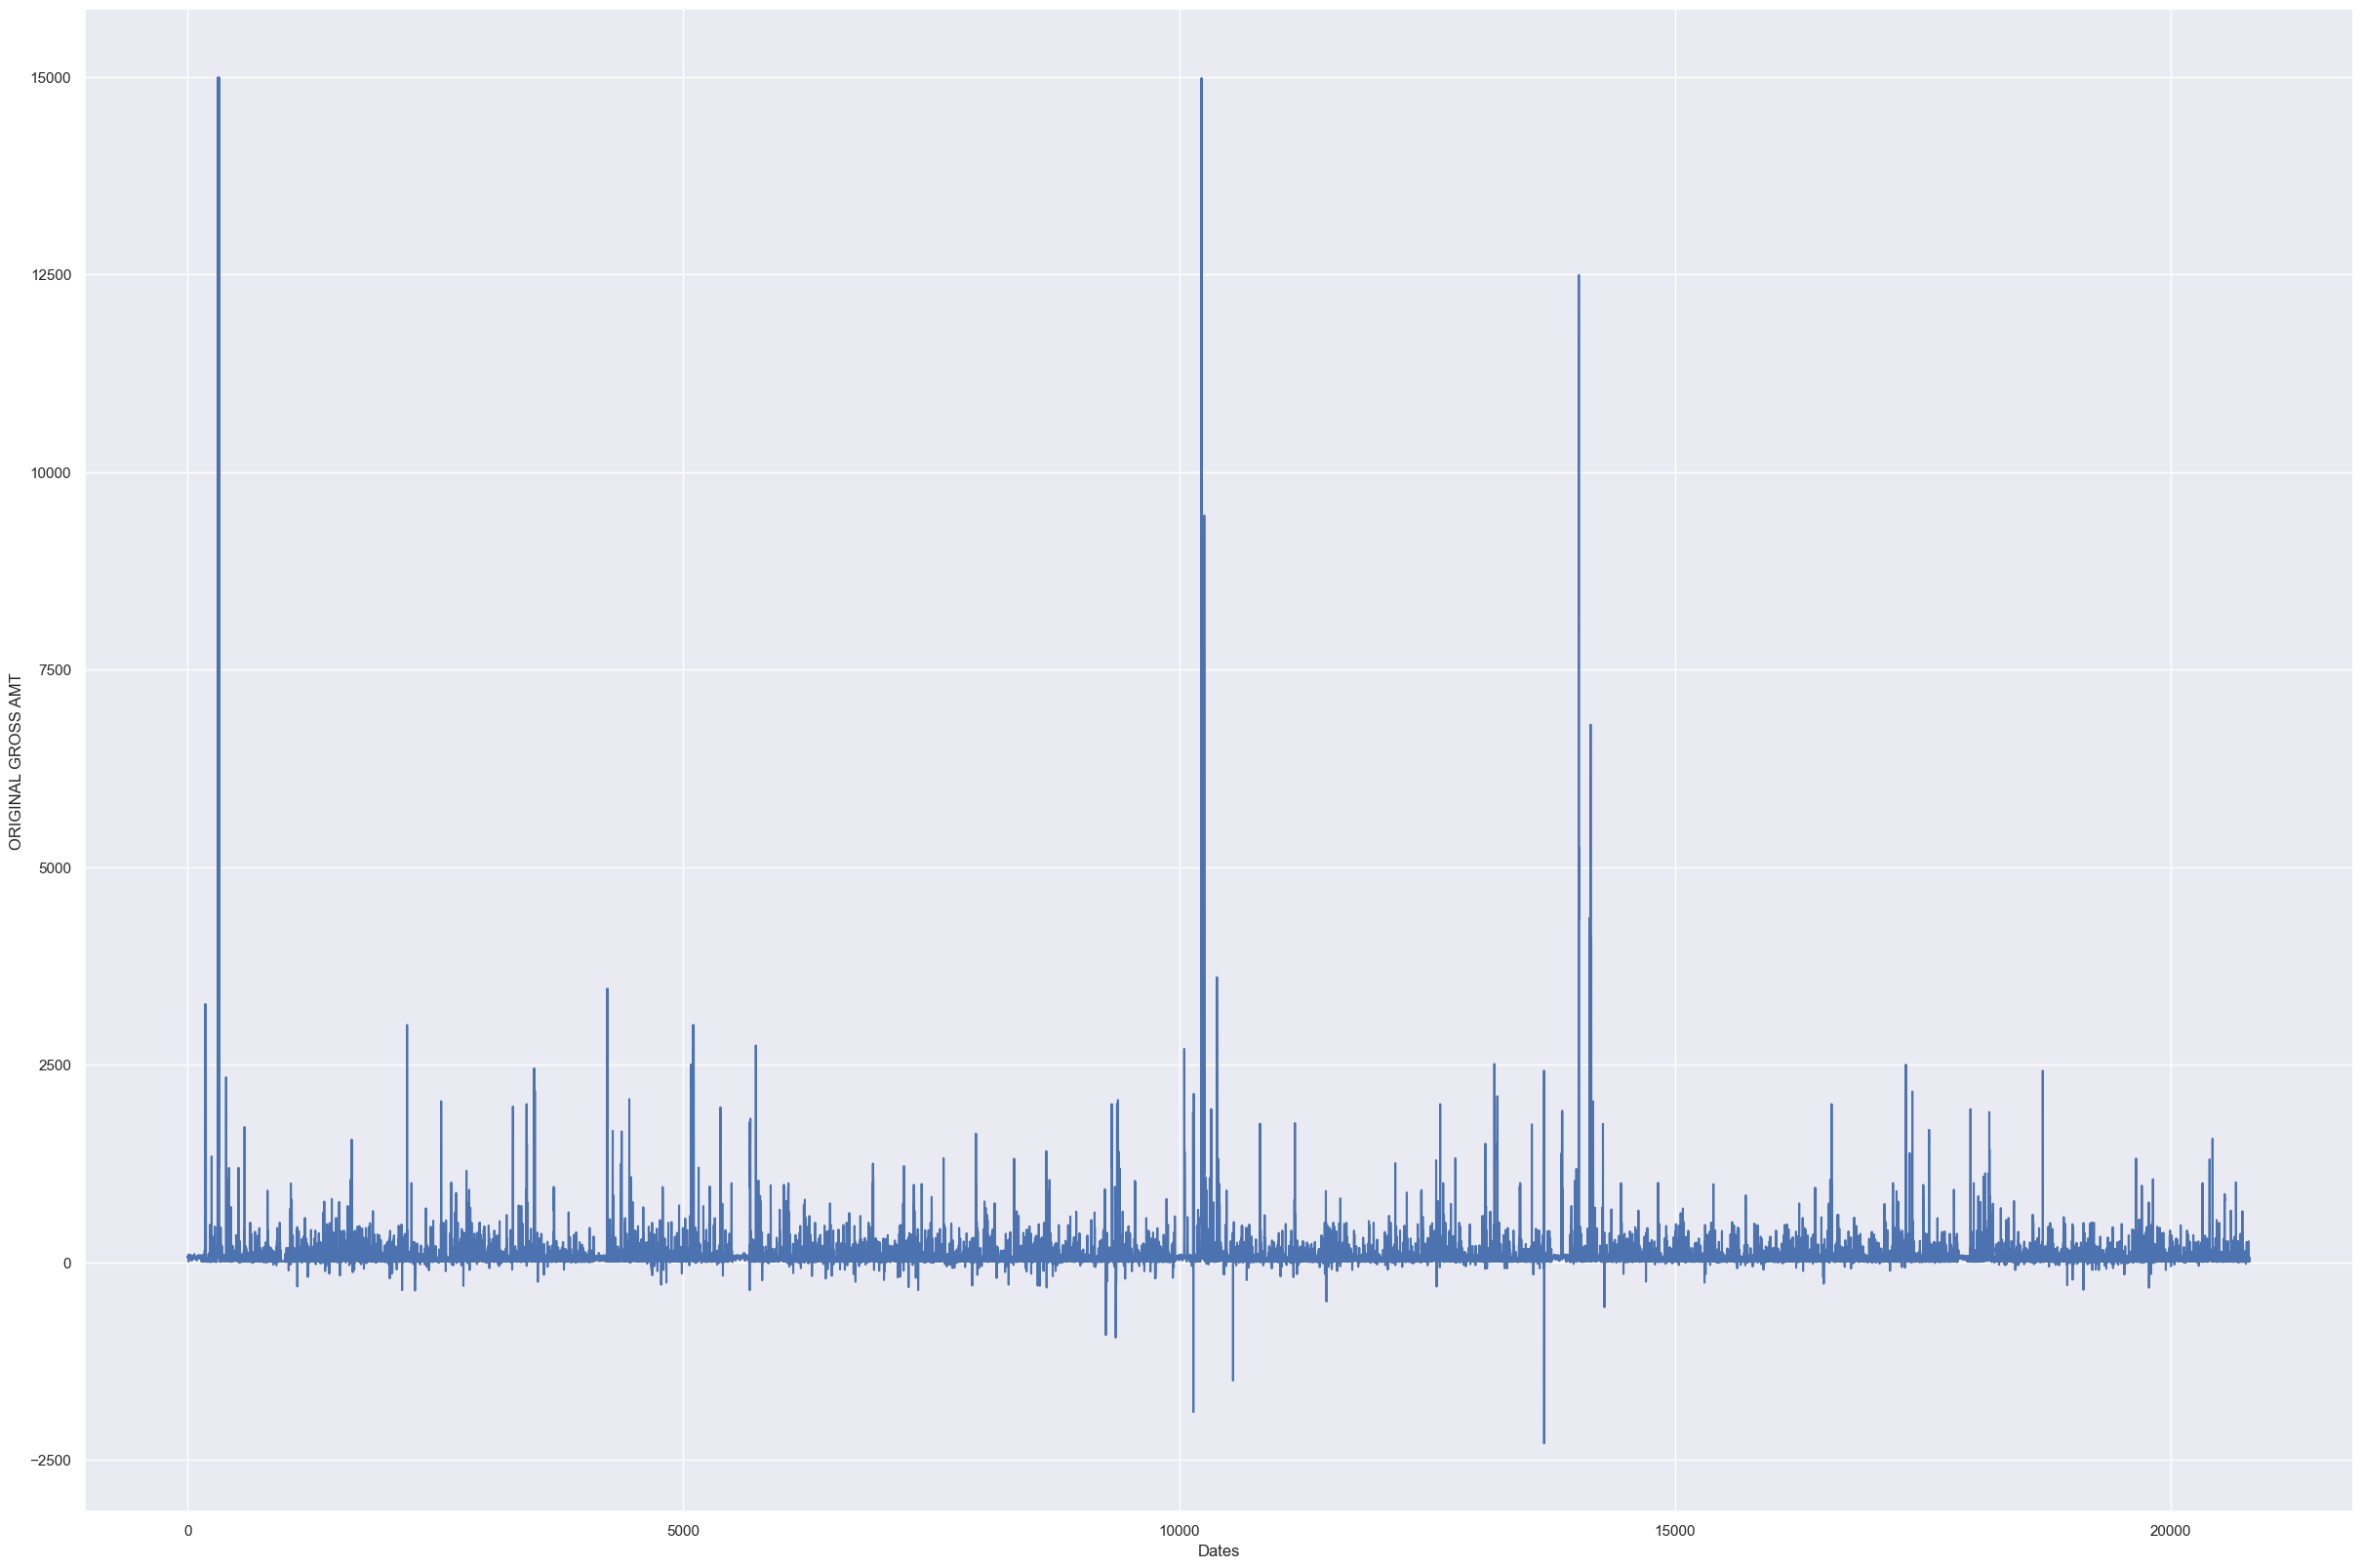

In [99]:
plt.figure(figsize=(30,20))
plt.plot(df['ORIGINAL GROSS AMT'])
plt.xlabel('Dates')
plt.ylabel('ORIGINAL GROSS AMT')

In [100]:
### If exists some relantionships betweem the numerical variables, I can plot all the relationships between all of them

# fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
# i=0    # Variable para almacenar la posición de la gráfica asociada
# for index, fila in df_dtype.loc[(df_dtype["type"]=="int64") | (df_dtype["type"]=="float64")].iterrows():
#     #Gráfica de dispersión entre la variable numérica y la variable objetivo "ORIGINAL GROSS AMT"
#     axes[i, 0].scatter(df[fila["column"]], df["ORIGINAL GROSS AMT"])
#     axes[i, 0].set_xlabel(fila["column"], fontsize=18)
#     axes[i, 0].set_ylabel("ORIGINAL GROSS AMT", fontsize=18)

#     #Boxplot de la variable numérica
#     axes[i, 1].boxplot(df[fila["column"]],vert=False)
#     axes[i, 1].set_xlabel(fila["column"], fontsize=18)
    
#     # Incrementa el valor de i en cada iteración
#     i=i+1

# Time Analysis for card transactions

## Volumetric analysis of transactions

In [152]:
month_spend_df = df[["ORIGINAL GROSS AMT", "TRANS_DATE_M"]].groupby(by=["TRANS_DATE_M"]).agg(["sum", "mean", "count"])
month_spend_df

ORIGINAL GROSS AMT                  
                            sum        mean count
TRANS_DATE_M                                     
1                       2353.41   51.161087    46
5                          0.00    0.000000    22
6                        420.60    4.571739    92
7                     411370.50  103.281572  3983
8                     169766.22  112.353554  1511
9                     349309.08   86.121568  4056
10                    395331.08   97.926946  4037
11                    370059.06   91.237441  4056
12                    220233.81   73.607557  2992

In [170]:
month_spend_df = df[["ORIGINAL GROSS AMT", "TRANS_DATE_YM"]].groupby(by=["TRANS_DATE_YM"]).agg(["sum", "mean", "count"])
month_spend_df

ORIGINAL GROSS AMT                  
                             sum        mean count
TRANS_DATE_YM                                     
2018-05                     0.00    0.000000    22
2018-06                   420.60    4.571739    92
2018-07                411370.50  103.281572  3983
2018-08                169766.22  112.353554  1511
2018-09                349309.08   86.121568  4056
2018-10                395331.08   97.926946  4037
2018-11                370059.06   91.237441  4056
2018-12                220233.81   73.607557  2992
2019-01                  2353.41   51.161087    46

#### Historically mean spend

<Axes: xlabel='None', ylabel='avr_spend'>

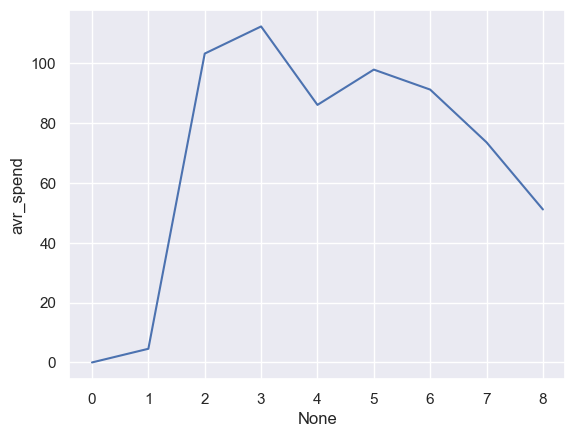

In [104]:
month_mean_spend_df = month_spend_df[[('ORIGINAL GROSS AMT',   'mean')]].reset_index(inplace=False)
month_mean_spend_df.columns = ["month_year", "avr_spend"]
sns.lineplot(x=month_mean_spend_df.index, y="avr_spend", data=month_mean_spend_df)

In [105]:
month_mean_spend_df[["avr_spend"]].mean()

avr_spend    68.91794
dtype: float64

the mean spend in the transactions per month is 68.92

## Historically total amount spend per month

<Axes: xlabel='None', ylabel='sum'>

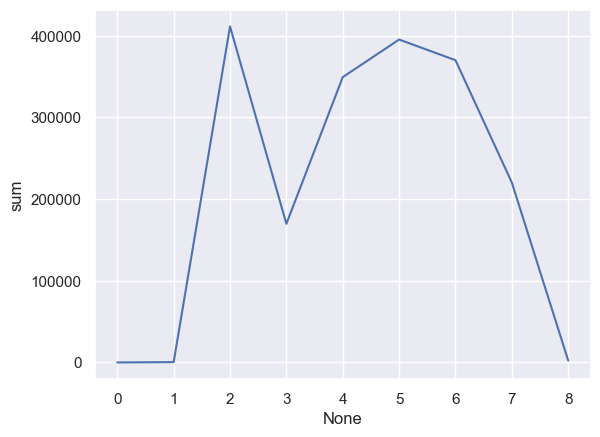

In [106]:
month_total_spend_df = month_spend_df[[('ORIGINAL GROSS AMT',   'sum')]].reset_index(inplace=False)
month_total_spend_df.columns = ["month_year", "sum"]
sns.lineplot(x=month_total_spend_df.index, y="sum", data=month_total_spend_df)

In [107]:
month_total_spend_df[["sum"]].mean()

sum    213204.862222
dtype: float64

The average total spend per month is 213204.86

Conclusions: When observing the different graphs of the numerical variables, some preliminary conclusions are found such as:

* There are outliers in multiple variables.
* Apparently there are strong correlations between some variables with the target, such as TRANS TAX AMT, BILLING GROSS AMT, but, the variables can contain the same values, maybe more information about the fiels will be needed.

## Data Exploration for Cathegorical Values

In a similar way as was done with the numerical variables, for the categorical variables an iteration is made over the 43 categorical variables, to know their frequency and their relationship with the objective variable SalePrice by means of a swarmplot diagram.

## Behavior of the DIRECTORATE column along the time

First of all, I am interested in knowing the "DIRECTORATE" behavior along the time. That helps infer if all the directorate buckets expend money all the months.

In [176]:
directorate_selected_df = df[["DIRECTORATE", "ORIGINAL GROSS AMT", "TRANS_DATE_YM"]]
directorate_time_1_df = directorate_selected_df.groupby(by=["DIRECTORATE", "TRANS_DATE_YM"]).agg(["sum", "mean", "count"])
directorate_full_time = directorate_selected_df[["DIRECTORATE", "ORIGINAL GROSS AMT"]].groupby(by=["DIRECTORATE"]).agg(["sum", "mean", "count", "var"])

In [117]:
directorate_full_time.columns = ["sum", "mean", "count", "var"]
directorate_full_time = directorate_full_time.reset_index(inplace=False)
directorate_full_time

,DIRECTORATE,sum,mean,count,var
0,Adult Social Care and Health,79140.45,86.967527,910,30711.615704
1,CYP&F,26552.27,63.069525,421,20961.986677
2,CYP&F SCHOOLS,927797.20,72.112327,12866,16318.712482
3,CYP&F Schools,7911.02,129.688852,61,55686.862237
4,Corporate Resources,436668.77,216.709067,2015,940142.633731
5,DEVELOPMENT,19521.41,65.071367,300,9168.601720
6,Development,1874.27,69.417407,27,3723.848851
7,Local Services,419378.37,99.971006,4195,60964.319955


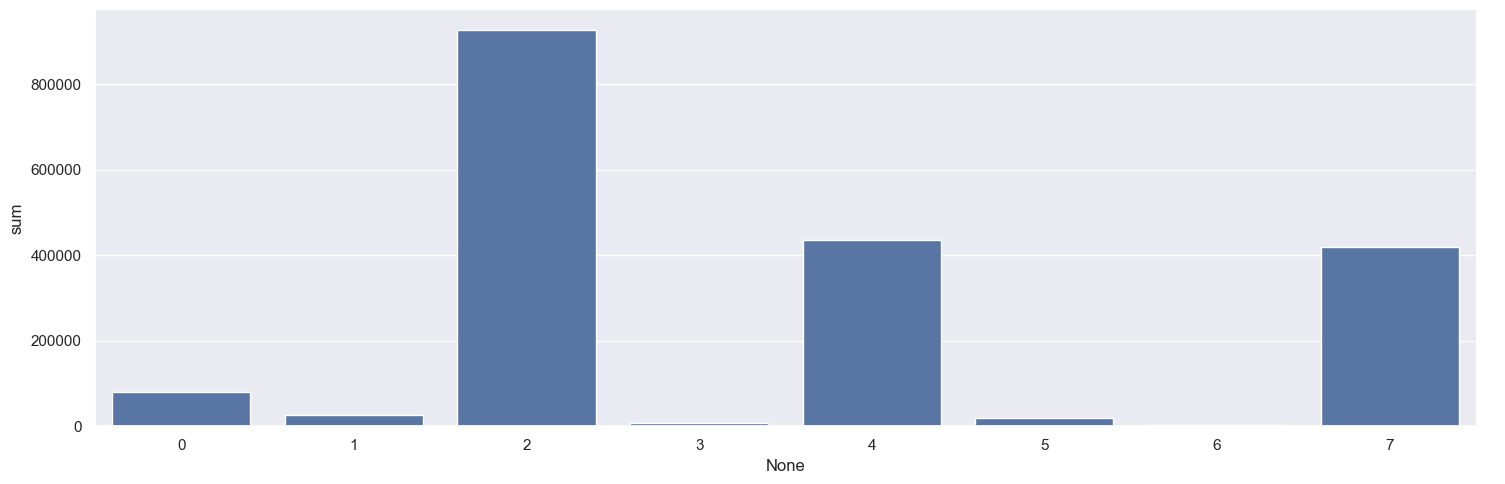

In [118]:

sns.catplot(x=directorate_full_time.index, y="sum", kind="bar", data=directorate_full_time, height=5, aspect=3) 

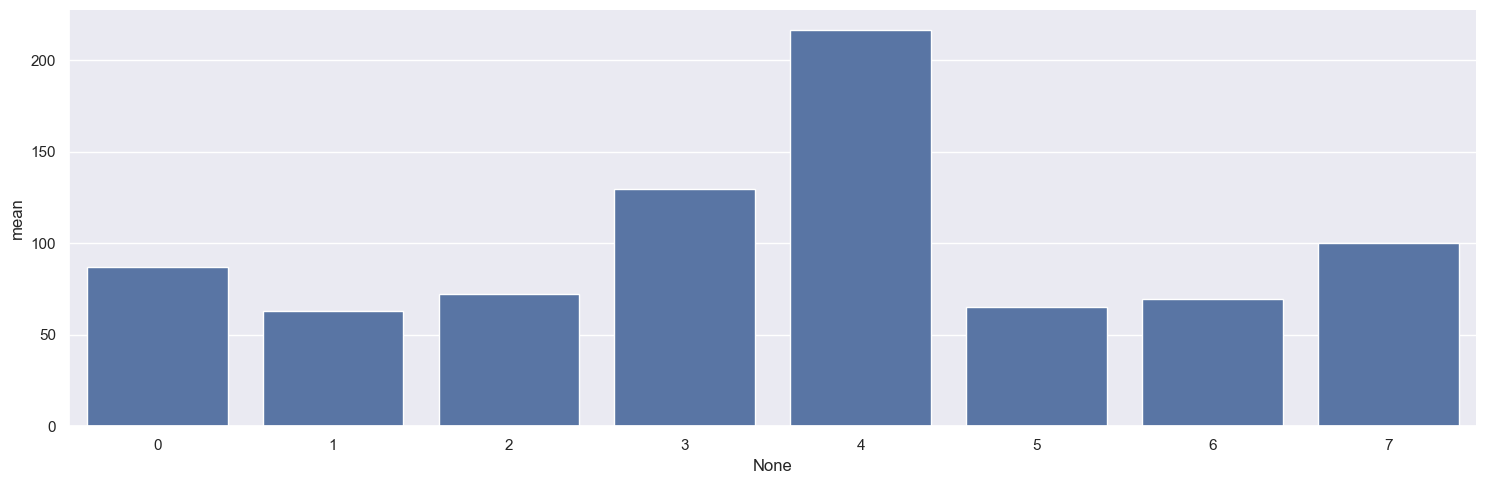

In [119]:
sns.catplot(x=directorate_full_time.index, y="mean", kind="bar", data=directorate_full_time, height=5, aspect=3) 

Now, I divide the data in the DIRECTORATE column according to the month. Each month has the possible values that DIRECTORATE takes. Based on this, the sum and average of the ORIGINAL GROSS AMT column is calculated, and a count of occurrences is also made.

In [120]:
directorate_time_2_df = directorate_selected_df.groupby(by=["TRANS_DATE_YM", "DIRECTORATE"]).agg(["sum", "mean", "count"])
directorate_time_2_df

ORIGINAL GROSS AMT              \
                                                          sum        mean   
TRANS_DATE_YM DIRECTORATE                                                   
2018-05       CYP&F SCHOOLS                              0.00    0.000000   
              Local Services                             0.00    0.000000   
2018-06       CYP&F SCHOOLS                            640.66   11.864074   
              Corporate Resources                        0.00    0.000000   
              DEVELOPMENT                               29.94   29.940000   
              Local Services                          -250.00   -7.142857   
2018-07       Adult Social Care and Health            9774.73   61.865380   
              CYP&F                                   7639.84   82.148817   
              CYP&F SCHOOLS                         199639.44   78.136767   
              Corporate Resources                   113965.68  321.936949   
              DEVELOPMENT                             3120.40   61.184314   
              Development                              354.70   88.675000   
              Local Services                         76875.71  100.098581   
2018-08       Adult Social Care and Health            8516.62   61.270647   
              CYP&F                                   3956.27   63.810806   
              CYP&F SCHOOLS                          24281.77   72.052730   
              Corporate Resources                    45060.33  152.230845   
              DEVELOPMENT                             2518.50   71.957143   
              Development                              420.69   60.098571   
              Local Services                         85012.04  133.877228   
2018-09       Adult Social Care and Health           10704.11   73.315822   
              CYP&F                                   4346.70   53.662963   
              CYP&F SCHOOLS                         212852.33   80.079883   
              Corporate Resources                    42095.71  108.774444   
              DEVELOPMENT                             3402.21   70.879375   
              Development                                9.98    9.980000   
              Local Services                         75898.04  103.262639   
2018-10       Adult Social Care and Health           19385.08  115.387381   
              CYP&F                                   3450.66   56.568197   
              CYP&F SCHOOLS                         180888.93   68.936330   
              Corporate Resources                   119872.72  326.628665   
              DEVELOPMENT                             2401.11   45.303962   
              Development                              604.15   86.307143   
              Local Services                         68728.43   90.790528   
2018-11       Adult Social Care and Health           23428.68  128.025574   
              CYP&F                                   4595.25   64.721831   
              CYP&F SCHOOLS                         180359.19   69.825470   
              CYP&F Schools                           7840.05  135.173276   
              Corporate Resources                    82911.99  225.918229   
              DEVELOPMENT                             3973.14   69.704211   
              Development                              467.15   66.735714   
              Local Services                         66483.61   91.073438   
2018-12       Adult Social Care and Health            7148.92   63.264779   
              CYP&F                                   2553.79   50.074314   
              CYP&F SCHOOLS                         128862.32   63.323007   
              CYP&F Schools                             70.97   23.656667   
              Corporate Resources                    31814.86  139.538860   
              DEVELOPMENT                             3976.38   75.026038   
              Development                               17.60   17.600000   
              Local Services           

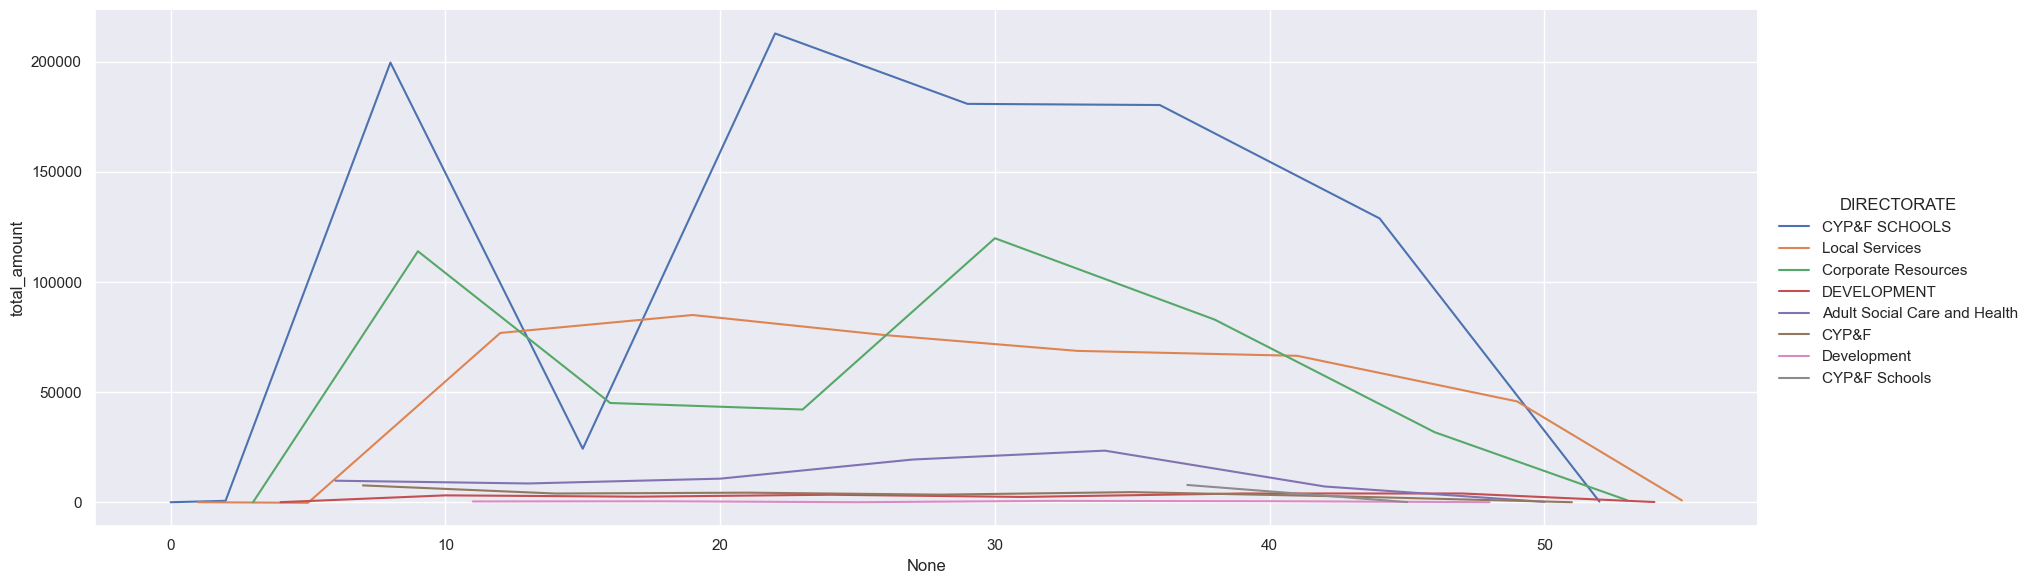

In [121]:
directorate_time_plot_total_amount_df = directorate_time_2_df[[('ORIGINAL GROSS AMT',   'sum')]].reset_index(inplace=False)
directorate_time_plot_total_amount_df.columns = ["month_year", "DIRECTORATE", "total_amount"]
sns.relplot(x=directorate_time_plot_total_amount_df.index, y="total_amount", hue="DIRECTORATE", kind="line", data=directorate_time_plot_total_amount_df, height=6, aspect=3) 

In [177]:
cat_df = df[["DIRECTORATE", "ORIGINAL GROSS AMT"]]

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Adult Social Care and Health'),
  Text(1, 0, 'Corporate Resources'),
  Text(2, 0, 'CYP&F'),
  Text(3, 0, 'CYP&F SCHOOLS'),
  Text(4, 0, 'DEVELOPMENT'),
  Text(5, 0, 'Development'),
  Text(6, 0, 'Local Services'),
  Text(7, 0, 'CYP&F Schools')])

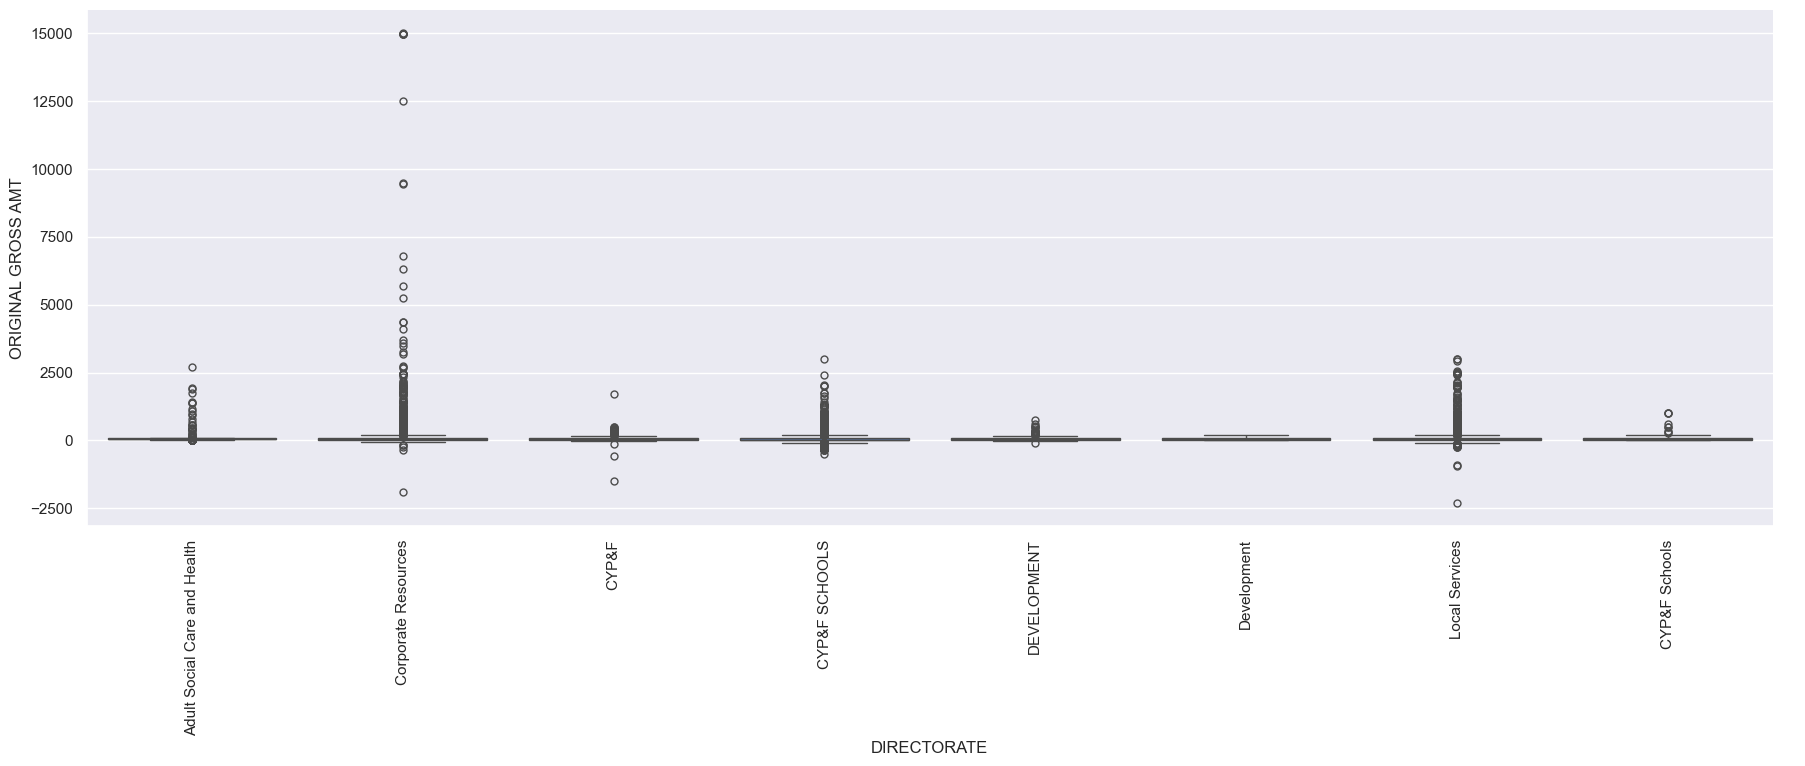

In [178]:
sns.catplot(x="DIRECTORATE", y="ORIGINAL GROSS AMT", kind="box", dodge=False, data=cat_df,height=6, aspect=3)
plt.xticks(rotation=90)

### comportment of the spend by category

In [124]:
trans_cac_desc_1_selected_df = df[["TRANS CAC DESC 1", "ORIGINAL GROSS AMT", "TRANS_DATE_YM"]]
trans_cac_desc_1_time_1_df = trans_cac_desc_1_selected_df.groupby(by=["TRANS CAC DESC 1", "TRANS_DATE_YM"]).agg(["sum", "mean", "count"])
trans_cac_desc_full_time = trans_cac_desc_1_selected_df[["TRANS CAC DESC 1", "ORIGINAL GROSS AMT"]].groupby(by=["TRANS CAC DESC 1"]).agg(["sum", "mean", "count"])

In [125]:
trans_cac_desc_full_time.columns = ["sum", "mean", "count"]
trans_cac_desc_full_time = trans_cac_desc_full_time.reset_index(inplace=False)

In [126]:
trans_cac_desc_full_time

,TRANS CAC DESC 1,sum,mean,count
0,AMO - Lighting,19.96,19.960000,1
1,Accomodation Hire,5701.19,300.062632,19
2,Advertising NonStaff,945.84,135.120000,7
3,AsbestosSurveys&Wrks,241.80,241.800000,1
4,Bank & Goro ChgsS,14855.46,168.812045,88
...,...,...,...,...
98,Vehicle Hire Charge,2459.45,189.188462,13
99,Vehicle OthrunCosts,2745.12,16.637091,165
100,Vehicle R&M,7528.85,175.089535,43
101,Visits Expenditure,52720.25,262.289801,201


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19

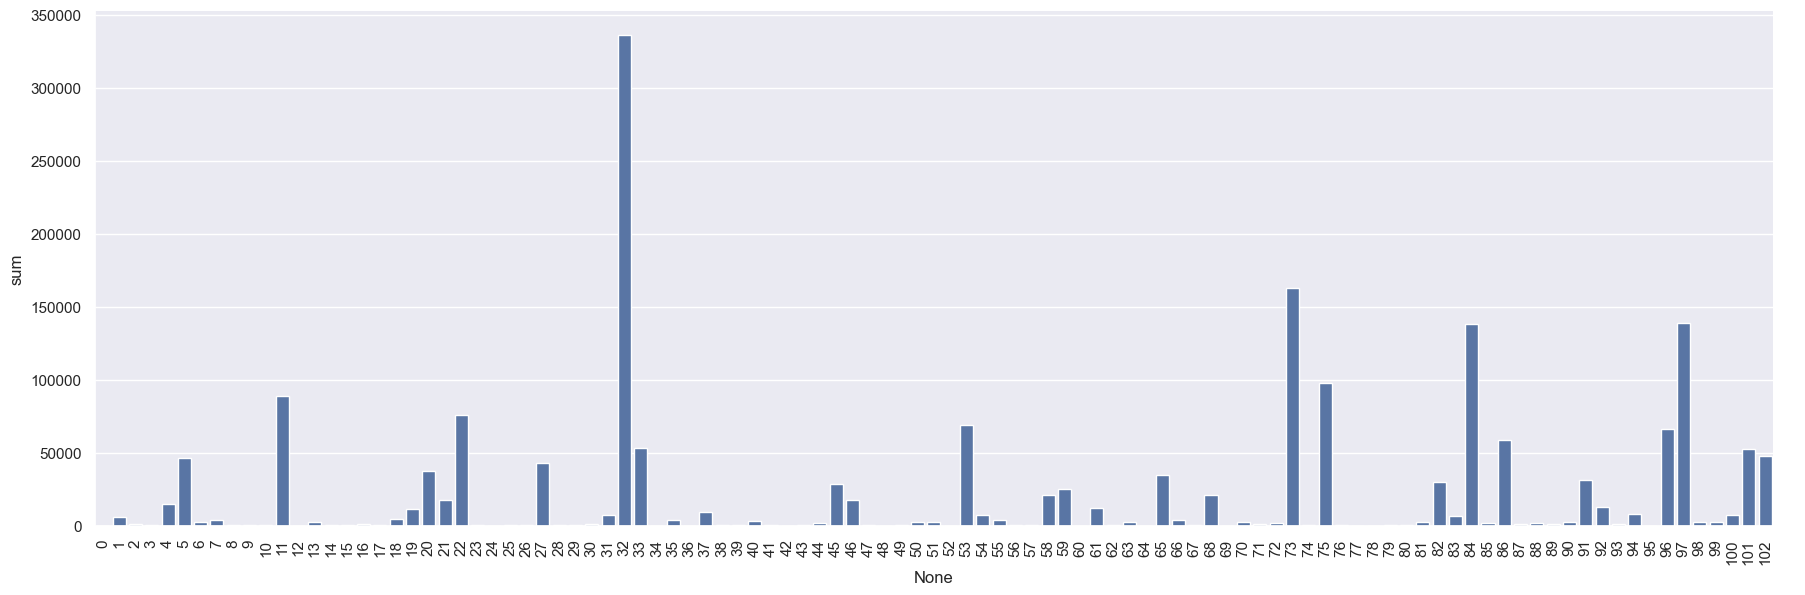

In [127]:
sns.catplot(x=trans_cac_desc_full_time.index, y="sum", kind="bar", data=trans_cac_desc_full_time, height=6, aspect=3)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19

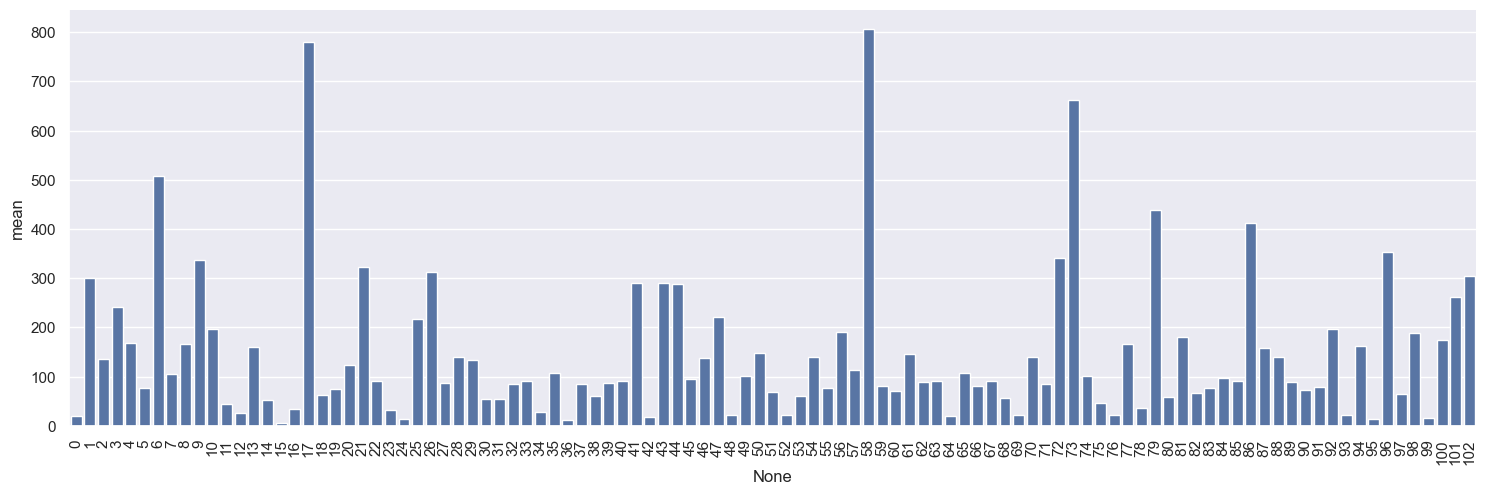

In [128]:
sns.catplot(x=trans_cac_desc_full_time.index, y="mean", kind="bar", data=trans_cac_desc_full_time, height=5, aspect=3)
plt.xticks(rotation=90)

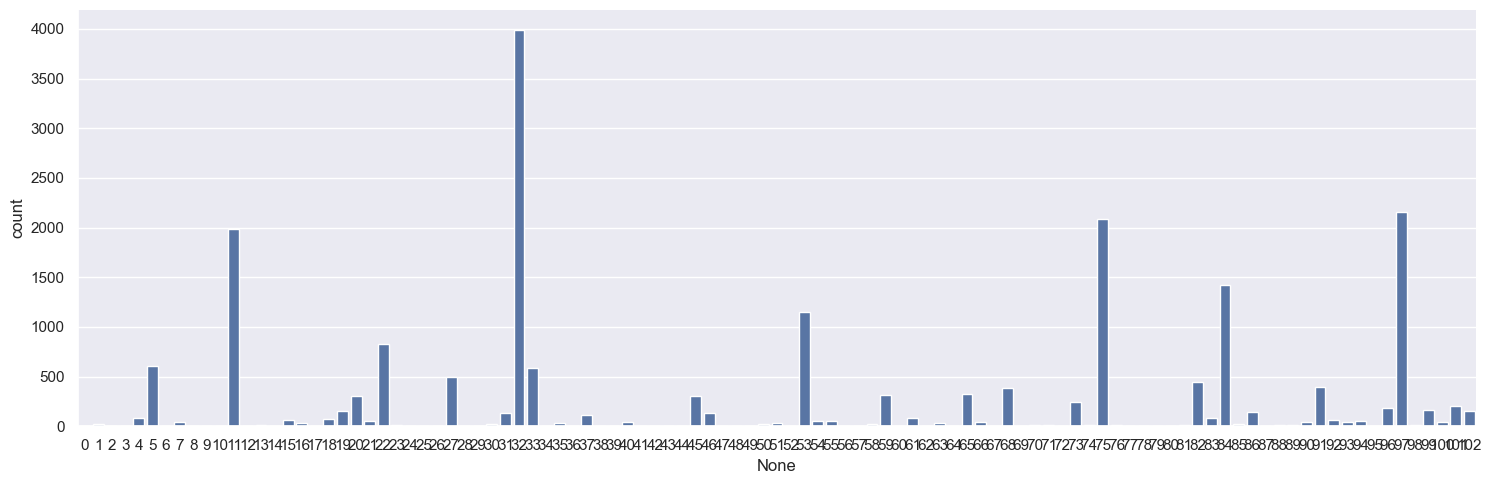

In [138]:
sns.catplot(x=trans_cac_desc_full_time.index, y="count", kind="bar", data=trans_cac_desc_full_time, height=5, aspect=3)

In [130]:
trans_cac_desc_1_time_1_df

ORIGINAL GROSS AMT                  
                                               sum        mean count
TRANS CAC DESC 1  TRANS_DATE_YM                                     
AMO - Lighting    2018-09                    19.96   19.960000     1
Accomodation Hire 2018-07                  3534.69  589.115000     6
                  2018-09                   703.00  234.333333     3
                  2018-10                   170.00   85.000000     2
                  2018-11                   484.50  161.500000     3
...                                            ...         ...   ...
Water Services    2018-08                  6618.22  367.678889    18
                  2018-09                  2478.25  225.295455    11
                  2018-10                  7729.73  386.486500    20
                  2018-11                 14312.23  511.151071    28
                  2018-12                 14010.00  241.551724    58

[466 rows x 3 columns]

In [131]:
trans_cac_desc_1_time_2_df = trans_cac_desc_1_selected_df.groupby(by=["TRANS_DATE_YM", "TRANS CAC DESC 1"]).agg(["sum", "mean", "count"])

In [132]:
trans_cac_desc_1_time_2_df

ORIGINAL GROSS AMT                  
                                                  sum        mean count
TRANS_DATE_YM TRANS CAC DESC 1                                         
2018-05       Bldg RM Departmental               0.00    0.000000     6
              Equip Operational                  0.00    0.000000     2
              Other Fix&Fittings                 0.00    0.000000     8
              Postage                            0.00    0.000000     2
              Stationery                         0.00    0.000000     4
...                                               ...         ...   ...
2019-01       Supplies & Sev Mic               210.00  105.000000     2
              Transport Misc                    31.50   31.500000     1
              Travel Bus/Rail                   40.93   40.930000     1
              Vehicle Fuel                     515.23   57.247778     9
              Vehicle OthrunCosts               60.00   60.000000     1

[466 rows x 3 columns]

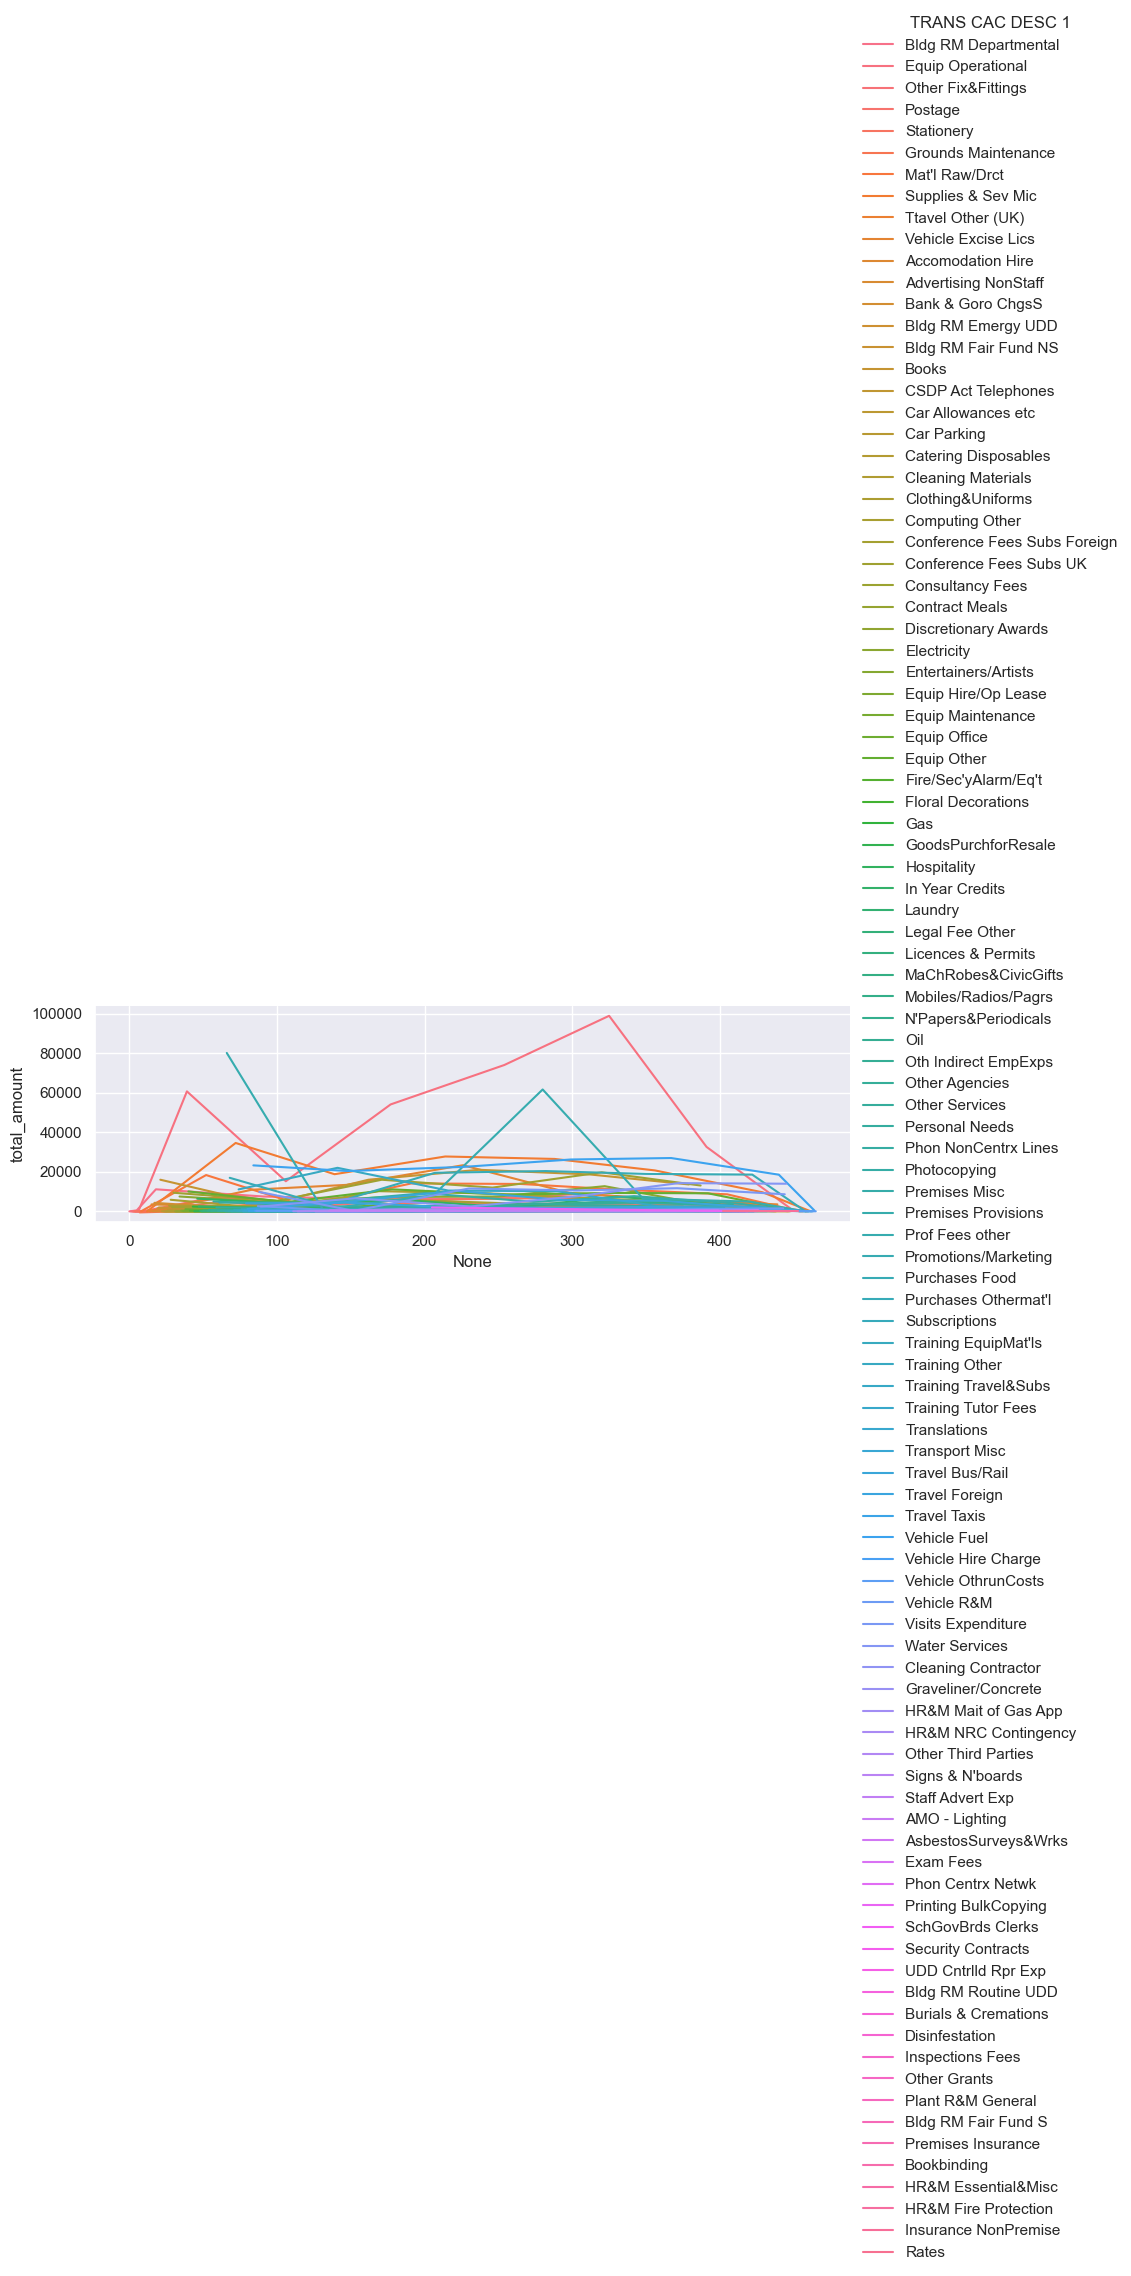

In [133]:
category_time_plot_total_amount_df = trans_cac_desc_1_time_2_df[[('ORIGINAL GROSS AMT',   'sum')]].reset_index(inplace=False)
category_time_plot_total_amount_df.columns = ["TRANS_DATE_YM", "TRANS CAC DESC 1", "total_amount"]
sns.relplot(x=category_time_plot_total_amount_df.index, y="total_amount", hue="TRANS CAC DESC 1", kind="line", data=category_time_plot_total_amount_df, height=3, aspect=3)

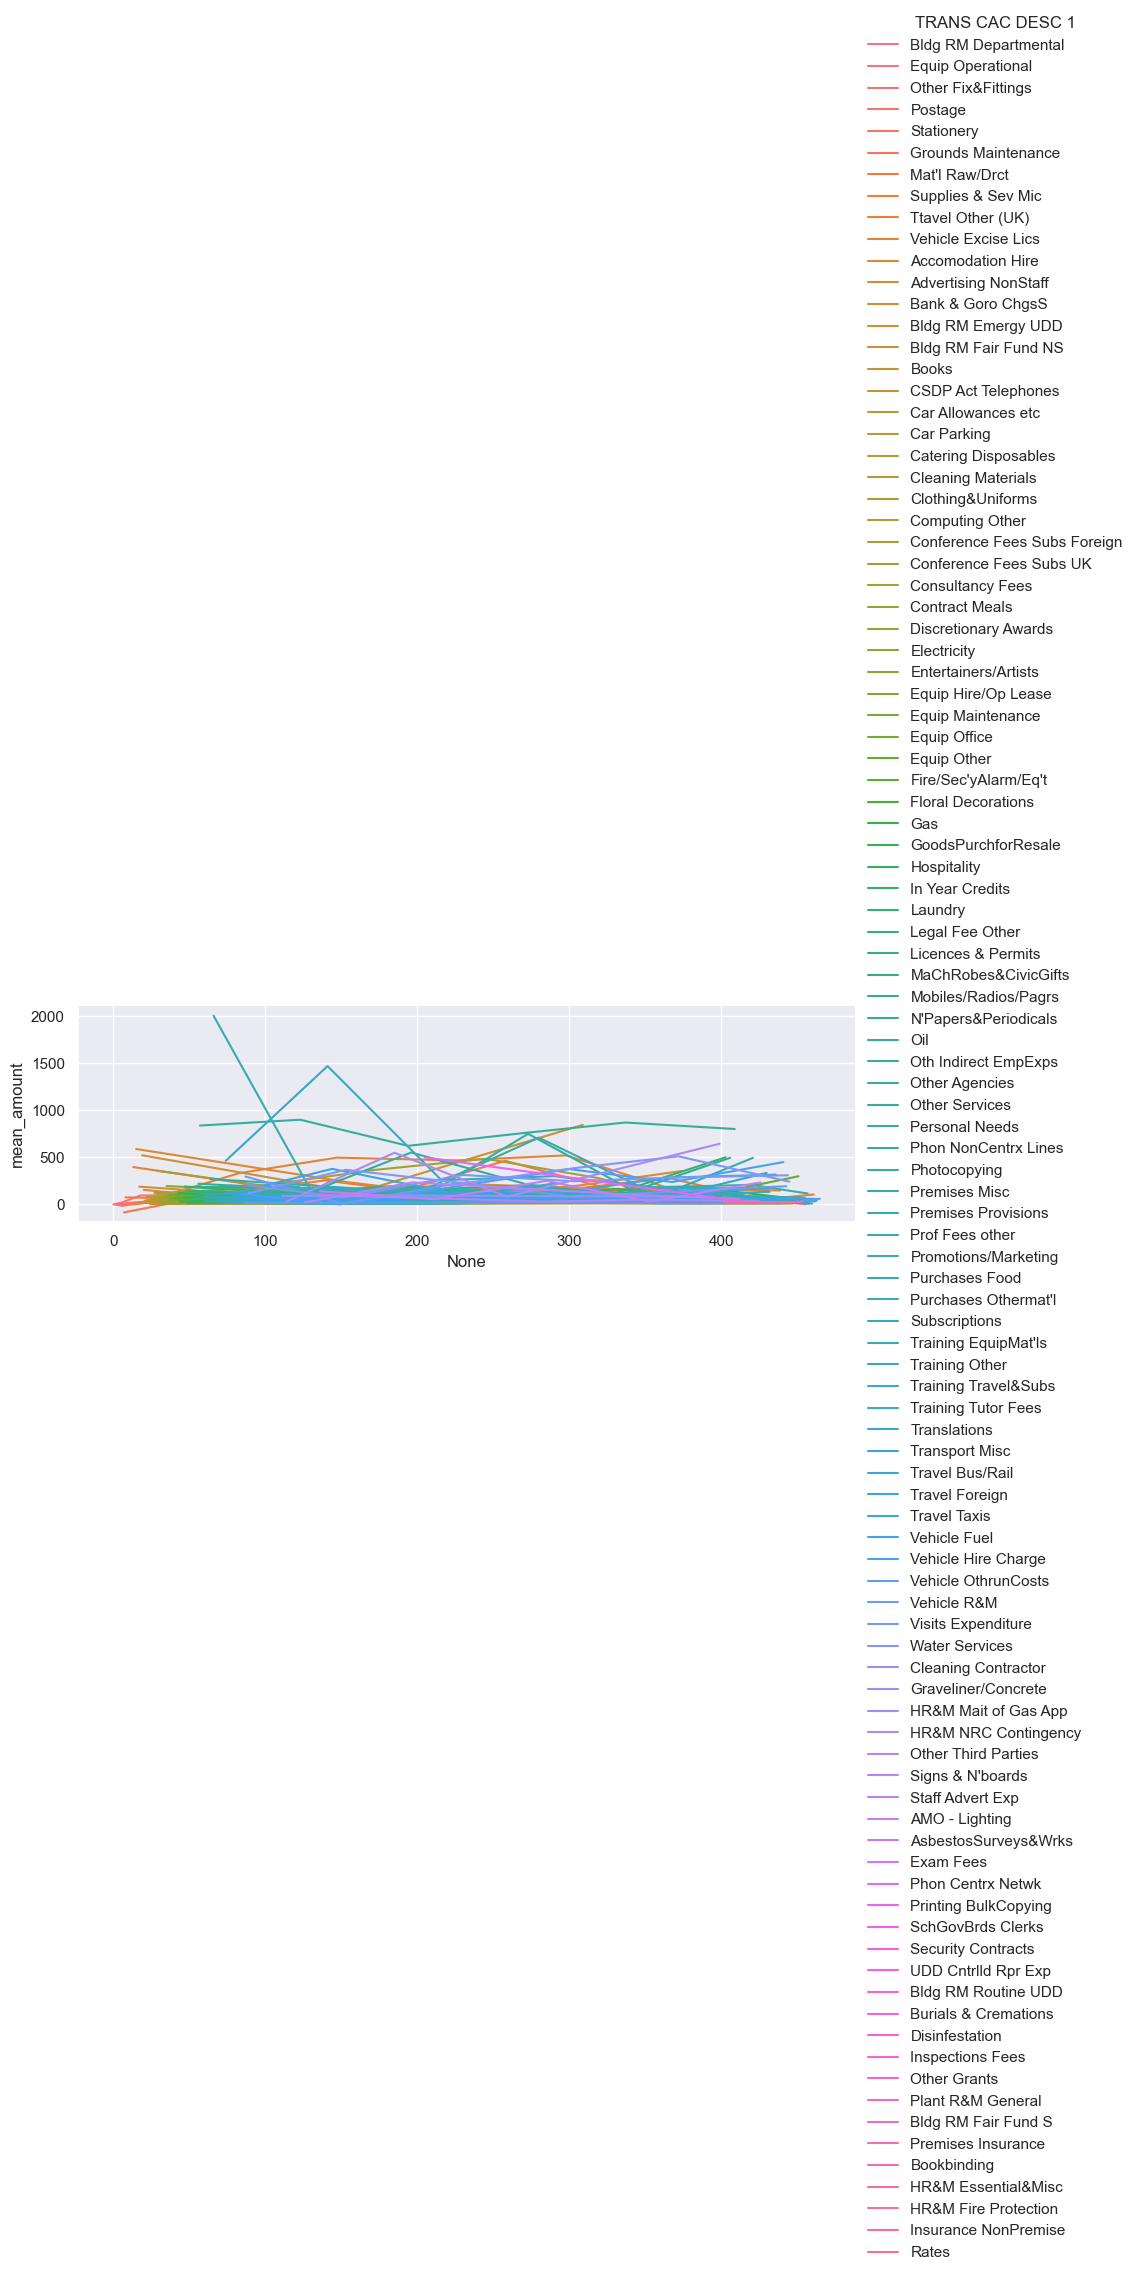

In [134]:
category_time_plot_total_amount_df = trans_cac_desc_1_time_2_df[[('ORIGINAL GROSS AMT',   'mean')]].reset_index(inplace=False)
category_time_plot_total_amount_df.columns = ["TRANS_DATE_YM", "TRANS CAC DESC 1", "mean_amount"]
sns.relplot(x=category_time_plot_total_amount_df.index, y="mean_amount", hue="TRANS CAC DESC 1", kind="line", data=category_time_plot_total_amount_df, height=3, aspect=3)

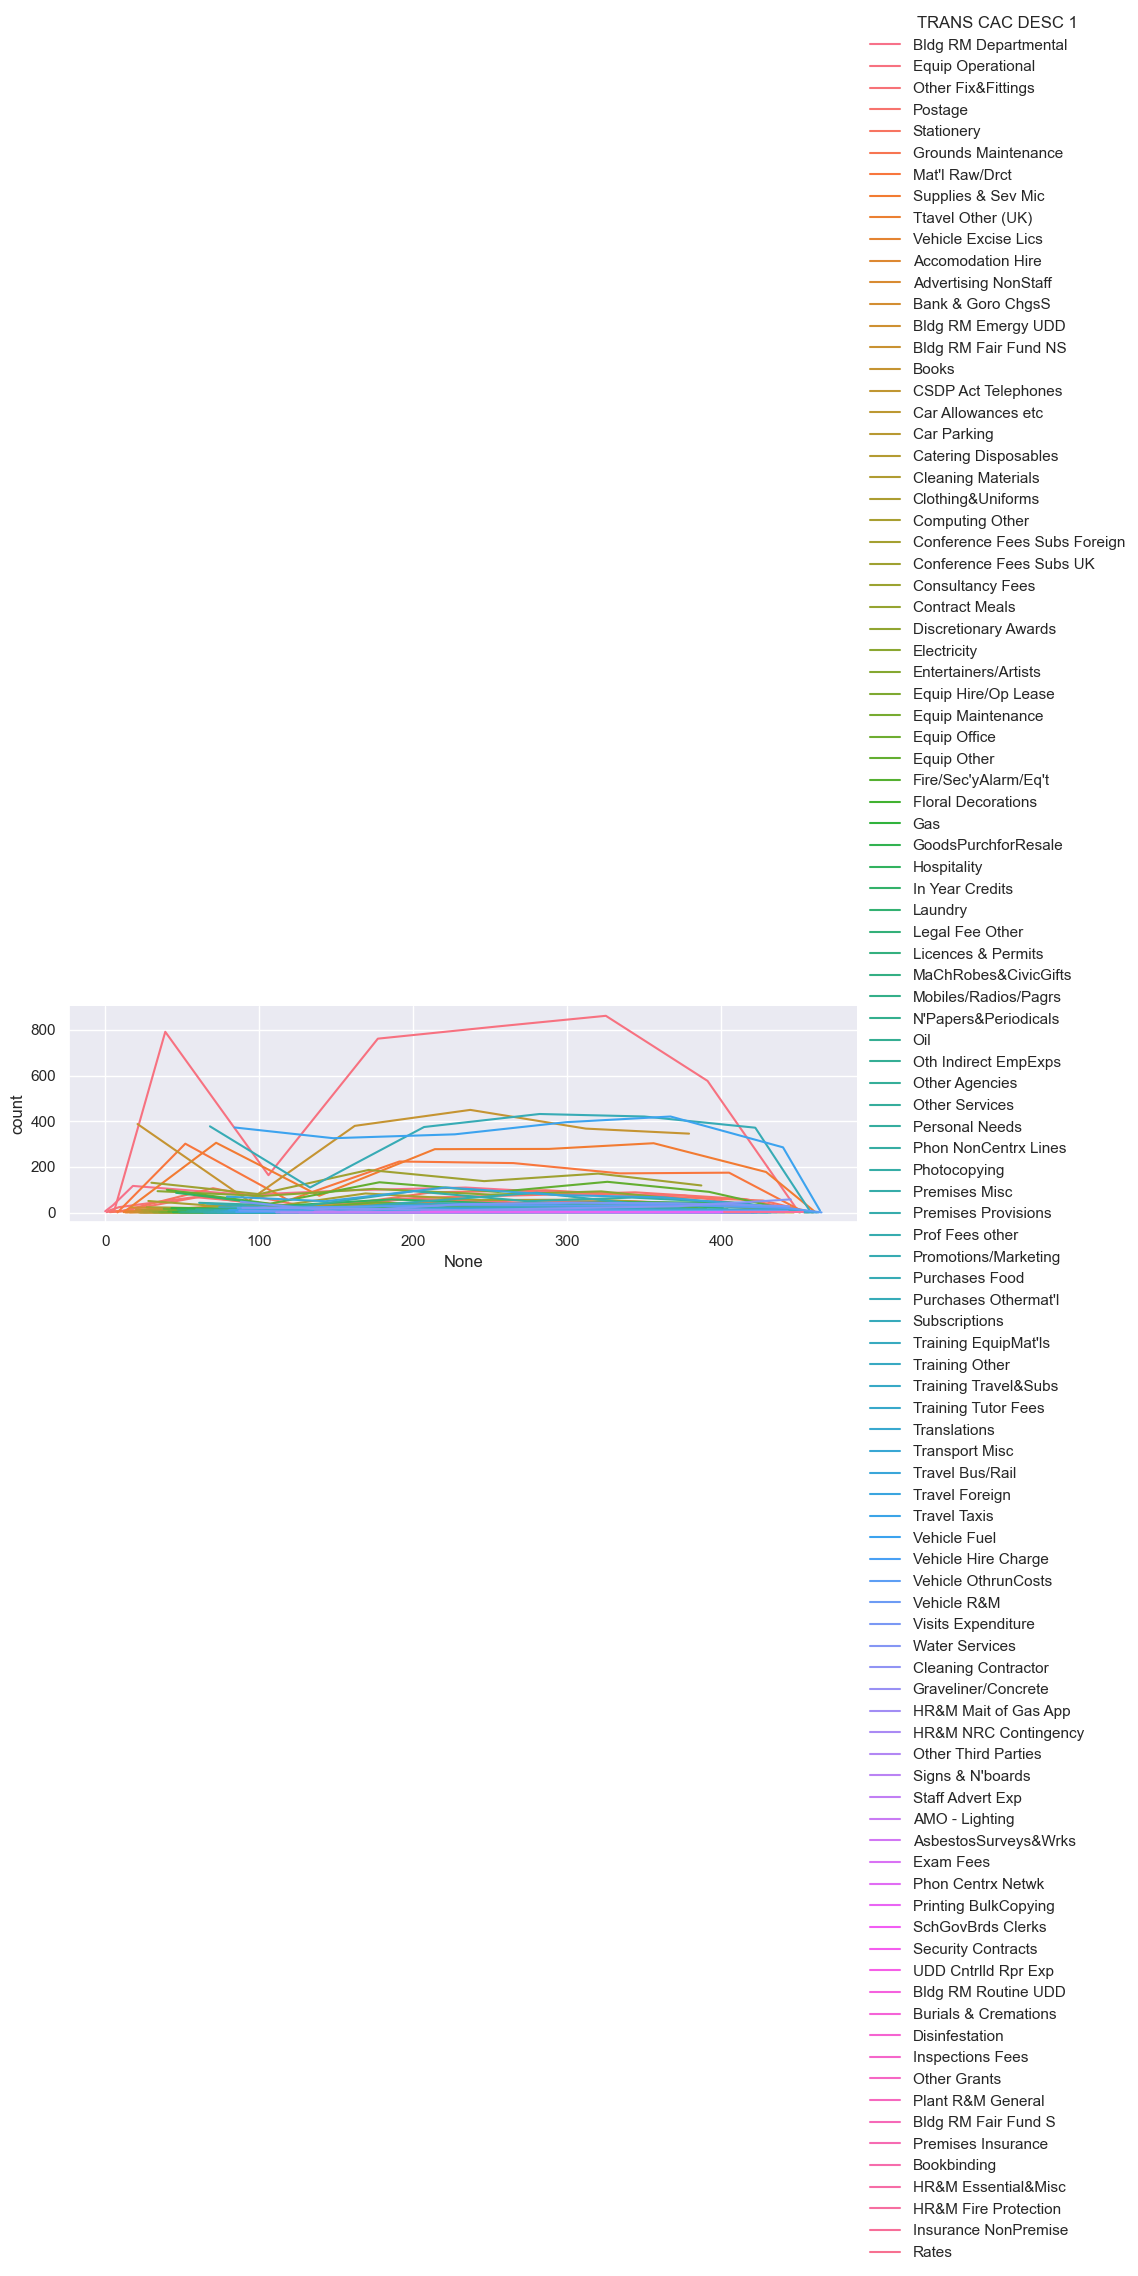

In [135]:
category_time_plot_total_amount_df = trans_cac_desc_1_time_2_df[[('ORIGINAL GROSS AMT',   'count')]].reset_index(inplace=False)
category_time_plot_total_amount_df.columns = ["TRANS_DATE_YM", "TRANS CAC DESC 1", "count"]
sns.relplot(x=category_time_plot_total_amount_df.index, y="count", hue="TRANS CAC DESC 1", kind="line", data=category_time_plot_total_amount_df, height=3, aspect=3)

### Historically report of spends by month directorate and category

In [136]:
df[["DIRECTORATE", "TRANS CAC DESC 1", "TRANS_DATE_YM", "ORIGINAL GROSS AMT"]].groupby(by=["TRANS_DATE_YM", "DIRECTORATE", "TRANS CAC DESC 1"]).agg(["sum", "mean", "count"])

ORIGINAL GROSS AMT  \
                                                                 sum   
TRANS_DATE_YM DIRECTORATE    TRANS CAC DESC 1                          
2018-05       CYP&F SCHOOLS  Bldg RM Departmental               0.00   
                             Postage                            0.00   
                             Stationery                         0.00   
              Local Services Equip Operational                  0.00   
                             Other Fix&Fittings                 0.00   
...                                                              ...   
2019-01       Local Services Prof Fees other                  115.44   
                             Stationery                        34.93   
                             Transport Misc                    31.50   
                             Travel Bus/Rail                   40.93   
                             Vehicle Fuel                     209.15   

                                                                   
                                                       mean count  
TRANS_DATE_YM DIRECTORATE    TRANS CAC DESC 1                      
2018-05       CYP&F SCHOOLS  Bldg RM Departmental    0.0000     6  
                             Postage                 0.0000     2  
                             Stationery              0.0000     2  
              Local Services Equip Operational       0.0000     2  
                             Other Fix&Fittings      0.0000     8  
...                                                     ...   ...  
2019-01       Local Services Prof Fees other       115.4400     1  
                             Stationery             34.9300     1  
                             Transport Misc         31.5000     1  
                             Travel Bus/Rail        40.9300     1  
                             Vehicle Fuel           52.2875     4  

[1077 rows x 3 columns]

In [137]:
df[["DIRECTORATE", "TRANS CAC DESC 1", "TRANS_DATE_YM", "ORIGINAL GROSS AMT"]].groupby(by=["DIRECTORATE", "TRANS CAC DESC 1", "TRANS_DATE_YM", ]).agg(["sum", "mean", "count"])

ORIGINAL GROSS AMT  \
                                                                                  sum   
DIRECTORATE                  TRANS CAC DESC 1        TRANS_DATE_YM                      
Adult Social Care and Health Conference Fees Subs UK 2018-09                   100.00   
                                                     2018-10                   814.00   
                             Equip Operational       2018-09                  1480.38   
                                                     2018-10                  8365.76   
                                                     2018-11                 12613.27   
...                                                                               ...   
Local Services               Visits Expenditure      2018-07                    14.86   
                                                     2018-08                   292.40   
                                                     2018-10                   305.21   
                                                     2018-12                    22.38   
                             Water Services          2018-08                   709.91   

                                                                                \
                                                                          mean   
DIRECTORATE                  TRANS CAC DESC 1        TRANS_DATE_YM               
Adult Social Care and Health Conference Fees Subs UK 2018-09         50.000000   
                                                     2018-10        407.000000   
                             Equip Operational       2018-09        493.460000   
                                                     2018-10        836.576000   
                                                     2018-11        788.329375   
...                                                                        ...   
Local Services               Visits Expenditure      2018-07          7.430000   
                                                     2018-08         73.100000   
                                                     2018-10         76.302500   
                                                     2018-12         22.380000   
                             Water Services          2018-08        709.910000   

                                                                          
                                                                   count  
DIRECTORATE                  TRANS CAC DESC 1        TRANS_DATE_YM        
Adult Social Care and Health Conference Fees Subs UK 2018-09           2  
                                                     2018-10           2  
                             Equip Operational       2018-09           3  
                                                     2018-10          10  
                                                     2018-11          16  
...                                                                  ...  
Local Services               Visits Expenditure      2018-07           2  
                                                     2018-08           4  
                                                     2018-10           4  
                                                     2018-12           1  
                             Water Services          2018-08           1  

[1077 rows x 3 columns]

That type of report can be used in a high-level meeting to make a spends control and focus the company spend on the more essential activities and cut the spend in not important activities for the business view.